# Figure 2: promiscuity

In [36]:
import pandas as pd
import csv
import os
import collections
import stylia
import matplotlib.pyplot as plt
import numpy as np
from stylia import NamedColors

pid2name = {}
with open("../data/pid2name_primary.tsv", "r") as f:
    reader = csv.reader(f, delimiter="\t")
    for r in reader:
        pid2name[r[0]] = r[1]

PAPER_WIDTH = 7.08661

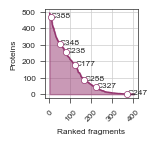

In [52]:
df = pd.read_csv("../data/finalScreen.tsv", sep="\t")
df = df[df["nUniq"] >= 2]
db = df[df["l2fc"] >= 2.3]
db = db[db["l2fcM"] >= 1]
db = db[db["ml10p"] > -np.log10(0.05)]
db = db[db["ml10adjP"] > -np.log10(2.5)]
db = db[db["rankRel"] < 500]
df = db

fragment_counts = collections.defaultdict(int)
for r in list(df["fragId"]):
    fragment_counts[r] += 1

fragment_counts = sorted(fragment_counts.items(), key=lambda x: -x[1])

y = [x[1] for x in fragment_counts] + [0]
x = [i for i in range(len(fragment_counts))] + [403]

fig, ax = plt.subplots(1,1, figsize=(1.5, 1.4))

ax = stylia.figure.figure.stylize(ax)

ax.plot(x, y, lw=1, color=NamedColors().purple)
ax.fill_betweenx(y, x, color=NamedColors().purple, alpha=0.5)
yticks = [0, 100, 200, 300, 400, 500]
ax.set_yticks(yticks)
ax.set_yticklabels(yticks, va="center",  ha="right", fontsize=6)
xticks = [0, 100, 200, 300, 400]
ax.set_xticks(xticks)
ax.set_xticklabels(xticks, va="top",  ha="center", fontsize=6, rotation=45)

fids = [x[0] for x in fragment_counts]
y = y[:-1]
x = x[:-1]

focus_fragments = ["C388", "C247", "C348", "C238", "C177", "C258", "C327"]

for i,fid in enumerate(fids):
    if fid in focus_fragments:
        ax.text(x[i], y[i], fid, fontsize=6)
        ax.scatter([x[i]], [y[i]], color="white", lw=0.5, edgecolor=NamedColors().purple, s=20, zorder=1000)

ax.set_ylabel("Proteins", fontsize=6)
ax.set_xlabel("Ranked fragments", fontsize=6)
ax.set_xlim(-20, 420)
ax.set_title("", fontsize=6)
#plt.fill_betweenx(np.array(x)*2, y)

plt.tight_layout()
plt.savefig("../assets/Figure02_A.png", dpi=600)
plt.savefig("../assets/Figure02_A.pdf")

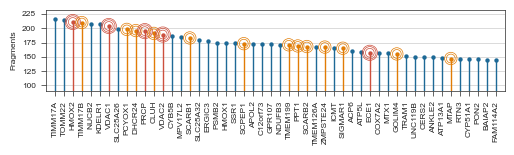

In [48]:
df = pd.read_csv("../data/finalScreen.tsv", sep="\t")
df = df[df["nUniq"] >= 2]
db = df[df["l2fc"] >= 2.3]
db = db[db["l2fcM"] >= 1]
db = db[db["ml10p"] > -np.log10(0.05)]
db = db[db["ml10adjP"] > -np.log10(2.5)]
db = db[db["rankRel"] < 500]
df = db

protein_counts = collections.defaultdict(int)
for r in list(df["accession"]):
    if r not in pid2name:
        gn = r
    else:
        gn = pid2name[r]
    protein_counts[gn] += 1

protein_counts = sorted(protein_counts.items(), key=lambda x: -x[1])[:50]

fig, ax = plt.subplots(1,1, figsize=(PAPER_WIDTH/1.39, 1.5))
ax = stylia.figure.figure.stylize(ax)

lb = pd.read_csv("../data/binddegs_frequent_hitters.csv", sep=";")

labelling_bias = list(lb[lb["kleiner"].notnull()]["gene_name"])
labelling_bias_soft = set(list(lb[lb["west"].notnull()]["gene_name"])).difference(labelling_bias)

for i, p in enumerate(protein_counts):
    l = p[0]
    if l in labelling_bias:
        color = NamedColors().red
        ax.scatter([i, i], [0, p[1]], s=40, color="none", edgecolor=color, lw=0.5, zorder=1000)
        ax.scatter([i, i], [0, p[1]], s=80, color="none", edgecolor=color, lw=0.5, zorder=1000)
        ax.scatter([i, i], [0, p[1]], s=120, color="none", edgecolor=color, lw=0.5, zorder=1000)
    elif l in labelling_bias_soft:
        color = NamedColors().orange
        ax.scatter([i, i], [0, p[1]], s=40, color="none", edgecolor=color, lw=0.5, zorder=1000)   
        ax.scatter([i, i], [0, p[1]], s=80, color="none", edgecolor=color, lw=0.5, zorder=1000)  
    else:
        color = NamedColors().blue
    ax.scatter([i], [p[1]], s=10, color=color, lw=0)
    ax.plot([i, i], [0, p[1]], color=color, lw=1)

ax.set_ylim(90, 232)

ax.set_xticks([i for i in range(len(protein_counts))])
ax.set_xticklabels([p[0] for p in protein_counts], fontsize=6, rotation=90, va="top", ha="center")

ax.set_yticks([100, 125, 150, 175, 200, 225])
ax.set_yticklabels([100, 125, 150, 175, 200, 225], fontsize=6)

ax.set_ylabel("Fragments", fontsize=6)
ax.set_xlabel("")
ax.set_title("")
ax.xaxis.grid()

ax.set_xlim(-1, 50)

plt.tight_layout()
plt.savefig("../assets/Figure02_C.png", dpi=600, bbox_inches="tight")
plt.savefig("../assets/Figure02_C.pdf", bbox_inches="tight")

In [40]:
df = pd.read_csv("../data/finalScreen.tsv", sep="\t")
df = df[df["nUniq"] >= 2]
db = df[df["l2fc"] >= 2.3]
db = db[db["l2fcM"] >= 1]
db = db[db["ml10p"] > -np.log10(0.05)]
db = db[db["ml10adjP"] > -np.log10(2.5)]
db = db[db["rankRel"] < 500]
df = db

enriched_proteome = set(df["accession"])

protein_counts = collections.defaultdict(int)
for r in list(df["accession"]):
    protein_counts[r] += 1

protein_counts = sorted(protein_counts.items(), key=lambda x: -x[1])[:]

top_prots = set([p[0] for p in protein_counts])
n = len(enriched_proteome)

sl = pd.read_csv("../data/subcellular_location.tsv", sep="\t")

human_proteome = pd.read_csv("../data/human_proteome_with_gene_names.tab", sep="\t")
name2pid = {}
for r in human_proteome[["Entry", "Gene names"]].values:
    if str(r[1]) == "nan": continue
    for x in r[1].split(" "):
        for y in x.split(";"):
            name2pid[y] = r[0]

proteins = []
c = 0
for gn in sl["Gene name"].tolist():
    if gn in name2pid:
        proteins += [name2pid[gn]]
    else:
        x = gn.split("-")
        if len(x) == 2:
            if len(x[1]) >= 3:
                prots = []
                if x[0] in name2pid:
                    prots += [name2pid[x[0]]]
                if x[1] in name2pid:
                    prots += [name2pid[x[1]]]
                if len(prots) > 0:
                    p = ";".join(prots)
                    proteins += [p]
                    continue
        proteins += [None]
        c += 1

sl["UniProtID"] = proteins
sl = sl[sl["UniProtID"].notnull()]

reliabilities = ['Approved', 'Enhanced', 'Supported', 'Uncertain']
sl_ = sl[sl["Reliability"].isin(reliabilities[:3])]

pid2loc = collections.defaultdict(list)
for r in sl_[["UniProtID", "Main location"]].values:
    if r[0] not in enriched_proteome:
        continue
    x = r[1].split(";")
    pid2loc[r[0]] += x

all_counts = collections.defaultdict(int)
top_counts = collections.defaultdict(int)

for k,v in pid2loc.items():
    for x in v:
        all_counts[x] += 1
        if k in top_prots:
            top_counts[x] += 1

high_level_loc = {

"Cytoplasm": [
    "Actin filaments",
    "Aggregosome",
    "Centriolar satellite",
    "Centrosome",
    "Cleavage furrow",
    "Cytokinetic bridge",
    "Cytoplasmic bodies",
    "Cytosol",
    "Focal adhesion sites",
    "Intermediate filaments",
    "Microtubule ends",
    "Microtubules",
    "Midbody",
    "Midbody ring",
    "Mitotic spindle",
    "Rods & Rings"
],

"Mitochondria": [
    "Mitochondria"
],

"Nucleous": [
    "Kinetochore",
    "Mitotic chromosome",
    "Nuclear bodies",
    "Nuclear speckles",
    "Nucleoli",
    "Nucleoli fibrillar center",
    "Nucleoli rim",
    "Nucleoplasm"
],

"Endomembrane": [
    "Nuclear membrane",
    "Cell Junctions",
    "Endoplasmic reticulum",
    "Endosomes",
    "Golgi apparatus",
    "Lipid droplets",
    "Lysosomes",
    "Peroxisomes",
    "Plasma membrane",
    "Vesicles"
]
}

In [41]:
df = pd.read_csv("../data/finalScreen.tsv", sep="\t")
df = df[df["nUniq"] >= 2]
db = df[df["l2fc"] >= 2.3]
db = db[db["l2fcM"] >= 1]
db = db[db["ml10p"] > -np.log10(0.05)]
db = db[db["ml10adjP"] > -np.log10(2.5)]
db = db[db["rankRel"] < 500]
df = db

pid2name = {}
with open("../data/pid2name_primary.tsv", "r") as f:
    reader = csv.reader(f, delimiter="\t")
    for r in reader:
        pid2name[r[0]] = r[1]

protein_counts = collections.defaultdict(int)
for r in list(df["accession"]):
    protein_counts[r] += 1

In [42]:
x = []
y = []
z = []

high_level_loc_inv = dict((x, k) for k,v in high_level_loc.items() for x in v)
for k,v in pid2loc.items():
    for w in v:
        x += [k]
        y += [w]
        z += [high_level_loc_inv[w]]

dp = pd.DataFrame({"uniprot_ac": x, "loc": y, "hloc": z})

counts = []
for p in dp["uniprot_ac"].tolist():
    counts += [protein_counts[p]]

dp["counts"] = counts

selected = dp[dp["counts"] >= 50].value_counts("loc").index.tolist()[:8]

mloc = []
for r in dp[["loc", "hloc"]].values:
    loc, hloc = r[0], r[1]
    if loc in selected:
        mloc += [loc]
    else:
        mloc += [hloc + " (other)"]

dp["mloc"] = mloc

In [44]:
labels = [
    "Endoplasmic reticulum", "Golgi apparatus", 'Nuclear membrane', 'Plasma membrane', 'Vesicles', 'Endomembrane (other)',
    'Cytosol', 'Mitochondria', 'Cytoplasm (other)',
    'Nucleoplasm', 'Nucleous (other)'
]

from scipy.stats import fisher_exact

def enrichment(cutoff, col="hloc"):
    locs = list(set(dp[col]))
    dr = collections.defaultdict(list)
    for l in locs:
        all_prots = set(dp["uniprot_ac"])
        cut_prots = set(dp[dp["counts"] >= cutoff]["uniprot_ac"])
        cat_prots = set(dp[dp[col] == l]["uniprot_ac"])
        a = len(cut_prots.intersection(cat_prots))
        b = len(cut_prots) - a
        c = len(cat_prots) - a
        d = len(all_prots) - (a+b+b)
        C = [[a,b],[c,d]]
        o, p = fisher_exact(C, alternative="greater")
        res = {
            "term": l,
            "cutoff": cutoff,
            "is_both": a,
            "is_term": len(cat_prots),
            "is_prom": len(cut_prots),
            "odds_ratio": o,
            "p_value": p
        }
        for k,v in res.items():
            dr[k] += [v]
    dr = pd.DataFrame(dr).sort_values("p_value")
    return dr

3.470130733053102e-20
3.470130733053102e-20
6.625022869570331e-05


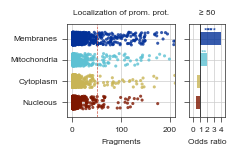

In [45]:
from stylia import ContinuousColorMap, NamedColors, ONE_COLUMN_WIDTH
import stylia
import numpy as np
from matplotlib.patches import Rectangle

fig, axs = stylia.create_figure(1,2, width = ONE_COLUMN_WIDTH/1.5, height = ONE_COLUMN_WIDTH/2.3, width_ratios=(3,1))
ax = axs.next()

ax.set_ylim(-0.7, 3.7)
ax.set_yticks([0, 1, 2, 3])
ax.set_yticklabels(["Nucleous", "Cytoplasm", "Mitochondria", "Membranes"])
#ax.set_yticklabels([])
#ax.axes.yaxis.set_visible(False)
ax.set_xlim(-10, 210)

noise = np.random.uniform(low=-0.3, high=0.3, size=dp.shape[0])
x = []
for hloc in dp["hloc"].tolist():
    if hloc == "Endomembrane":
        x += [3]
        continue
    if hloc == "Mitochondria":
        x += [2]
        continue
    if hloc == "Cytoplasm":
        x += [1]
        continue
    if hloc == "Nucleous":
        x += [0]
        continue

term2idx = {
    "Endomembrane": 3,
    "Mitochondria": 2,
    "Cytoplasm": 1,
    "Nucleous": 0
}

x_ = []
for i, n in enumerate(noise):
    x_ += [x[i] + n]

y = dp["counts"].tolist()

ax.axvline(x=50, color=NamedColors().red, linestyle="--")

cmap = ContinuousColorMap("spectral", transformation="uniform")
cmap.fit([i for i in range(4)])
colors = cmap.transform(x)

ax.scatter(y, x_, s=5, color=colors, alpha=0.8, lw=0)

stylia.label(ax, xlabel="Fragments", title="Localization of prom. prot.")

ax = axs.next()

cutoff = 50
dr = enrichment(50)
colors = cmap.transform([i for i in range(4)])
for r in dr[["term", "odds_ratio", "p_value"]].values:
    t = r[0]
    o = r[1]
    p = r[2]
    idx = term2idx[t]
    r = Rectangle(xy=(1, idx-0.3), width=o-1, height=0.6, color=colors[idx], lw=0, alpha=0.8)
    ax.add_patch(r)
    if p < 1e-15:
        ax.text(1+(o-1)/2, idx+0.35, "****", color=colors[idx], va="center", ha="center", fontsize=6)
        print(p)
    if p < 1e-3:
        ax.text(1+(o-1)/2, idx+0.35, "**", color=colors[idx], va="center", ha="center", fontsize=6)
        print(p)

ax.axvline(x=1, lw=0.5, color="black")

ax.set_ylim(-0.7, 3.7)
ax.set_yticks([0, 1, 2, 3])
#ax.set_yticklabels([])
#ax.axes.yaxis.set_visible(False)

ax.set_xticks([0, 1, 2, 3, 4])
ax.set_xlim(-0.5, 4.5)

ax.set_yticklabels("")
stylia.label(ax, title="≥ 50", xlabel="Odds ratio", ylabel="")

stylia.save_figure("../assets/Figure02_D.png")
stylia.save_figure("../assets/Figure02_D.pdf")

In [37]:
def read_annotations(file_name):
    fn = os.path.join("../data/{0}.tsv".format(file_name))
    R = []
    with open(fn, "r") as f:
        reader = csv.reader(f, delimiter="\t")
        for r in reader:
            R += [[r[0], r[1]]]
    return R

anns = read_annotations("pharos_dto")
pid2ann = collections.defaultdict(list)
for r in anns:
    pid2ann[r[0]] += [r[1]]

ann2pid = collections.defaultdict(list)
for pid in list(human_proteome):
    if pid not in pid2ann:
        ann2pid["Unknown"] += [pid]
    else:
        for x in pid2ann[pid]:
            ann2pid[x] += [pid]

ann2pid = dict((k, set(v)) for k,v in ann2pid.items())

ann2pid_sorted = sorted(ann2pid.items(), key = lambda x: -len(x[1]))

keeps = sorted([x[0] for x in ann2pid_sorted[:50]], key = lambda x: x.lower())